#UABC_Talk - Clasificación de SPAM

### Otoño 2023

### UABC_Talk-1b

**Enrique Naredo García**

#Clasificación de SPAM

El aumento en el volumen de correos electrónicos no deseados llamados "spam" ha creado una intensa necesidad de desarrollar filtros más confiables y robustos.

* Todos sabemos que cada día se envían miles de millones de spam a las cuentas de correo electrónico de los usuarios y más del 90% de estos correos electrónicos no deseados son maliciosos y causan un daño importante al usuario.
* Cualquier mensaje promocional o anuncio que acabe en nuestra bandeja de entrada se puede catalogar como "spam" ya que no aporta ningún valor y muchas veces nos molesta.
* Aproximadamente uno de cada 1,000 correos electrónicos contiene cargos de malware.
* Por eso es importante que aprendamos cómo podemos clasificar nuestros correos electrónicos como seguros e inseguros.

## Importar librerías

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, \
        train_test_split, StratifiedKFold, cross_val_score,learning_curve

## Montar Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Conjunto de datos

In [ ]:
spam = pd.read_csv('AQUI_PON_TU_RUTA_DEL_DRIVE',
                   encoding='latin-1')
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Usa estos datos en la celda de abajo para que corra correctmente:
* "v2" : "text", "v1":"label"

In [ ]:
spam = spam.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
spam = spam.rename(columns={"CAMBIA_AQUI"})


Usa este intervalo en la siguiente celda:
* [1990 : 2000]

In [ ]:
spam[]

In [ ]:
spam["CAMBIA_AQUI"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## Procesamiento de Lenguaje Natural

In [ ]:
# Import nltk packages and Punkt Tokenizer Models
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
ham_words = ''
spam_words = ''

In [ ]:
# Creating a corpus of spam messages
for val in spam[spam['label'] == 'spam'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '

In [ ]:
# Creating a corpus of ham messages
for val in spam[spam['label'] == 'ham'].text:
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '


In [ ]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

##Nube de palabras

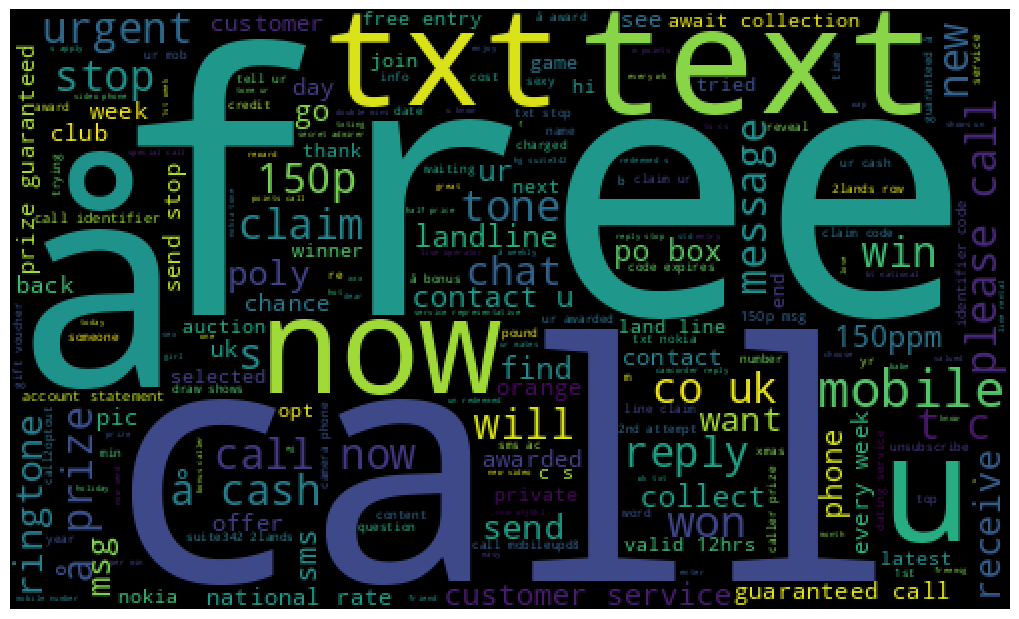

In [ ]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

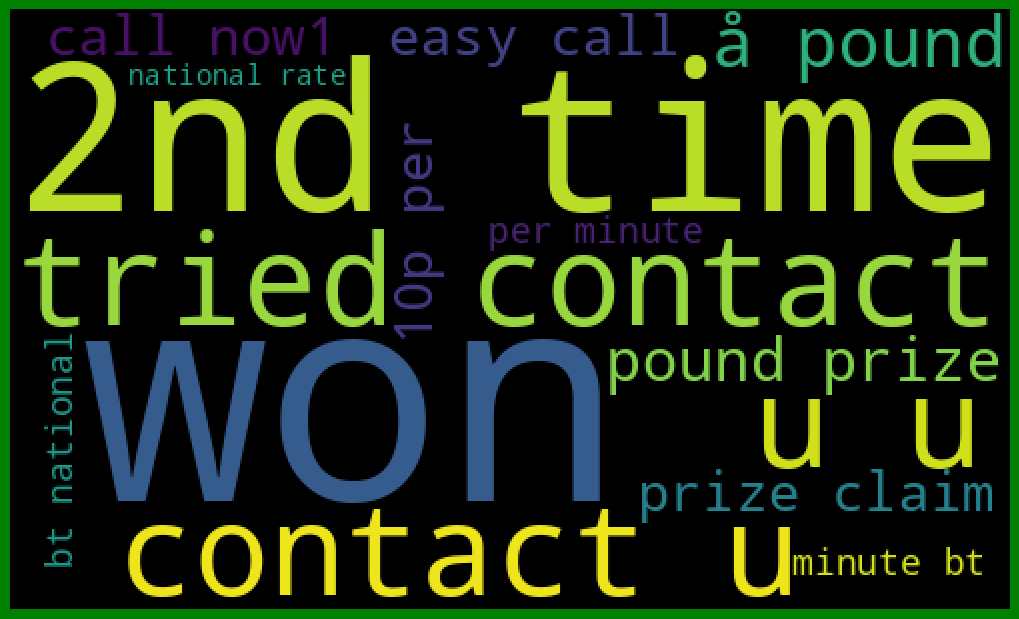

In [ ]:
#Creating Ham wordcloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


##Conversión de clases a números

Usa estas clases en la siguiente celda:
* ['ham','spam']

In [ ]:
spam = spam.replace(["CAMBIA_AQUI"],[0, 1])
spam.head(10)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


## Stop Words

* Las Stop Words o palabras vacías, hacen referencia a aquellas palabras que no están registradas por los robots de Google, las cuales carecen de sentido cuando se escriben solas o sin la palabra clave o keyword.

* Este término ha nacido en el lenguaje informático, muy utilizado, por ejemplo, en el contexto de la creación contenido.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#remove the punctuations and stopwords
import string
def text_process(text):

    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    return " ".join(text)

In [ ]:
spam['text'] = spam['text'].apply(text_process)
spam.head()

,label,text
0,0,Go jurong point crazy Available bugis n great ...
1,0,Ok lar Joking wif u oni
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say early hor U c already say
4,0,Nah dont think goes usf lives around though


In [ ]:
text = pd.DataFrame(spam['text'])
label = pd.DataFrame(spam['label'])

## Frecuencia de palabras

Sustituye en la siguiente celda:
* "Total de palabras en el conjunto de datos: "

In [ ]:
## Counting how many times a word appears in the dataset

from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i][0].split(" "):
        total_counts[word] += 1

print("CAMBIA_AQUI", len(total_counts))

Total words in data set:  11305


In [ ]:
# Sorting in decreasing order (Word with highest frequency appears first)
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])


['u', '2', 'call', 'U', 'get', 'Im', 'ur', '4', 'ltgt', 'know', 'go', 'like', 'dont', 'come', 'got', 'time', 'day', 'want', 'Ill', 'lor', 'Call', 'home', 'send', 'going', 'one', 'need', 'Ok', 'good', 'love', 'back', 'n', 'still', 'text', 'im', 'later', 'see', 'da', 'ok', 'think', 'Ì', 'free', 'FREE', 'r', 'today', 'Sorry', 'week', 'phone', 'mobile', 'cant', 'tell', 'take', 'much', 'night', 'way', 'Hey', 'reply', 'work', 'make', 'give', 'new']


## Vectorizar texto

In [ ]:
# Mapping from words to index

vocab_size = len(vocab)
word2idx = {}
#print vocab_size
for i, word in enumerate(vocab):
    word2idx[word] = i

In [ ]:
# Text to Vector
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)

In [ ]:
# Convert all titles to vectors
word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
for i, (_, text_) in enumerate(text.iterrows()):
    word_vectors[i] = text_to_vector(text_[0])

word_vectors.shape

(5572, 11305)

In [ ]:
#convert the text data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(spam['text'])
vectors.shape

(5572, 9376)

In [ ]:
print(vectors[5571, 9375])

0.0


##Datos entrenamiento y prueba

In [ ]:
#features = word_vectors
features = vectors

In [ ]:
#split the dataset into train and test set
X_train, X_test, y_train, y_test = \
    train_test_split(features, spam['label'], test_size=0.15, random_state=111)

## Modelos para clasificar

In [ ]:
#import sklearn packages for building classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#initialize multiple classification models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [ ]:
#create a dictionary of variables and models
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

##Entrenamiento

In [ ]:
#fit the data onto the models
def train(clf, features, targets):
    clf.fit(features, targets)

##Predicción

In [ ]:
def predict(clf, features):
    return (clf.predict(features))

In [ ]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

In [ ]:
pred_scores_word_vectors

[('SVC', [0.9784688995215312]),
 ('KN', [0.9330143540669856]),
 ('NB', [0.9880382775119617]),
 ('DT', [0.9605263157894737]),
 ('LR', [0.9533492822966507]),
 ('RF', [0.9796650717703349])]

In [ ]:
#write functions to detect if the message is spam or not
def find(x):
    if x == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")


In [ ]:
newtext = ["Free entry"]
integers = vectorizer.transform(newtext)


In [ ]:
x = mnb.predict(integers)
find(x)


Message is SPAM


##Matriz de confusión

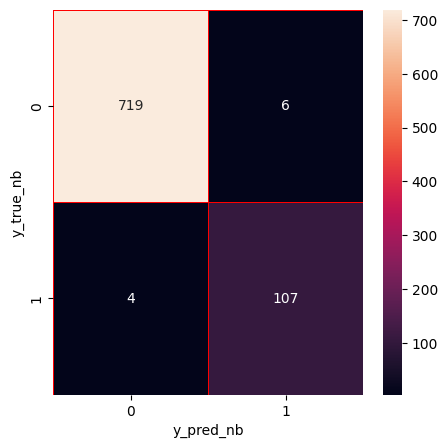

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Naive Bayes
y_pred_nb = mnb.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()